<a href="https://colab.research.google.com/github/amirkasaei/K-Nearest-Neighbors-with-scikit-learn/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Importing Required Libraries**

#### **load the required libraries**

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from math import sqrt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

#### **set GPU**

In [3]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# **Loading Data**

In [4]:
abalone_columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

In [6]:
abalone = pd.read_csv(url, names=abalone_columns)
abalone.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [7]:
abalone.shape

(4177, 9)

#### **encode dataset**

In [8]:
le = LabelEncoder()

abalone[['Sex']] = abalone[['Sex']].apply(le.fit_transform, axis=0)

abalone.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    2   0.455     0.365   0.095        0.5140          0.2245   
1    2   0.350     0.265   0.090        0.2255          0.0995   
2    0   0.530     0.420   0.135        0.6770          0.2565   
3    2   0.440     0.365   0.125        0.5160          0.2155   
4    1   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7

#### **Data Correlation**

In [9]:
correlation_matrix = abalone.corr()
correlation_matrix

Sex    Length  Diameter    Height  Whole weight  \
Sex             1.000000 -0.036066 -0.038874 -0.042077     -0.021391   
Length         -0.036066  1.000000  0.986812  0.827554      0.925261   
Diameter       -0.038874  0.986812  1.000000  0.833684      0.925452   
Height         -0.042077  0.827554  0.833684  1.000000      0.819221   
Whole weight   -0.021391  0.925261  0.925452  0.819221      1.000000   
Shucked weight -0.001373  0.897914  0.893162  0.774972      0.969405   
Viscera weight -0.032067  0.903018  0.899724  0.798319      0.966375   
Shell weight   -0.034854  0.897706  0.905330  0.817338      0.955355   
Rings          -0.034627  0.556720  0.574660  0.557467      0.540390   

                Shucked weight  Viscera weight  Shell weight     Rings  
Sex                  -0.001373       -0.032067     -0.034854 -0.034627  
Length                0.897914        0.903018      0.897706  0.556720  
Diameter              0.893162        0.899724      0.905330  0.574660  
Height                0.774972        0.798319      0.817338  0.557467  
Whole weight          0.969405        0.966375      0.955355  0.540390  
Shucked weight        1.000000        0.931961      0.882617  0.420884  
Viscera weight        0.931961        1.000000      0.907656  0.503819  
Shell weight          0.882617        0.907656      1.000000  0.627574  
Rings                 0.420884        0.503819      0.627574  1.000000

# **helper function**

In [10]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
  print(f'{dom} Confusion matrix')
  cf = confusion_matrix(y_train_pred,y_train)
  sns.heatmap(cf,annot=True,yticklabels=classes, xticklabels=classes, cmap='Blues', fmt='g')
  plt.tight_layout()
  plt.show()

# **Classification**

## **Sex**

### **Feature Selection**

In [12]:
classes = le.classes_
classes

array(['F', 'I', 'M'], dtype=object)

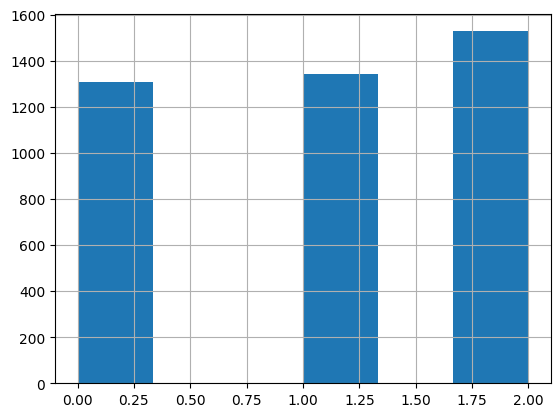

In [13]:
abalone['Sex'].hist(bins=6)
plt.show()

In [14]:
pd.DataFrame(correlation_matrix["Sex"])

Sex
Sex             1.000000
Length         -0.036066
Diameter       -0.038874
Height         -0.042077
Whole weight   -0.021391
Shucked weight -0.001373
Viscera weight -0.032067
Shell weight   -0.034854
Rings          -0.034627

**divide given columns into two types of variables (target variable and feature variables).**

In [15]:
x = abalone[abalone_columns[1:]]
y = abalone['Sex']
x.head()

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

### **Splitting Data**
80% train and 20% test

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### **Best K**

In [31]:
k_values = [i for i in range (1,100)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    score = cross_val_score(knn, x, y, cv=10)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

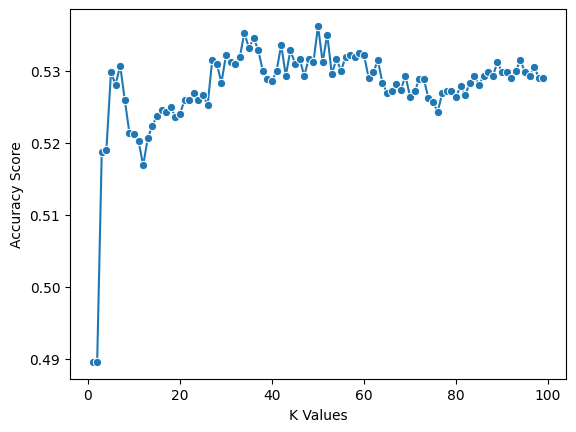

In [32]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [51]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
print('best K:', best_k)

best K: 50


### **Model**

In [42]:
scoring = {'accuracy' : make_scorer(precision_score, average = 'weighted'),
           'precision' : make_scorer(precision_score, average = 'weighted'),
           'recall' : make_scorer(recall_score, average = 'weighted'),
           'f1_score' : make_scorer(f1_score, average = 'weighted')}

In [43]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
score = cross_validate(knn, x, y, cv=10, scoring=scoring)

In [44]:
score

{'fit_time': array([0.00704598, 0.00476122, 0.00428224, 0.00443435, 0.00435638,
        0.00422573, 0.00447798, 0.00457811, 0.00428796, 0.00590491]),
 'score_time': array([0.01076174, 0.0101943 , 0.00984168, 0.01049495, 0.00929737,
        0.01434755, 0.01064515, 0.00952911, 0.01444817, 0.00971723]),
 'test_accuracy': array([0.41479753, 0.51756295, 0.53362302, 0.54827888, 0.55301462,
        0.47949586, 0.54099444, 0.49754717, 0.54804421, 0.50774673]),
 'test_precision': array([0.41479753, 0.51756295, 0.53362302, 0.54827888, 0.55301462,
        0.47949586, 0.54099444, 0.49754717, 0.54804421, 0.50774673]),
 'test_recall': array([0.41626794, 0.53827751, 0.55980861, 0.54784689, 0.54784689,
        0.48803828, 0.55502392, 0.4940048 , 0.55395683, 0.51079137]),
 'test_f1_score': array([0.41523617, 0.51608428, 0.54053625, 0.54727303, 0.55011897,
        0.48284772, 0.54462727, 0.49551105, 0.55042233, 0.50890384])}

In [50]:
avg_accuracy = np.mean(score['test_accuracy'])
avg_precision = np.mean(score['test_precision'])
avg_recall = np.mean(score['test_recall'])
avg_f1_score = np.mean(score['test_f1_score'])
print('average accuracy=', avg_accuracy, '\naverage precision=', avg_precision, '\naverage recall=', avg_recall, '\naverage f1-score=', avg_f1_score)

average accuracy= 0.5141105406696844 
average precision= 0.5141105406696844 
average recall= 0.5211863045448809 
average f1-score= 0.5151560912517004


In [ ]:
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
accuracy_score(y_test, pred)

## **Rings**

### **Feature Selection**

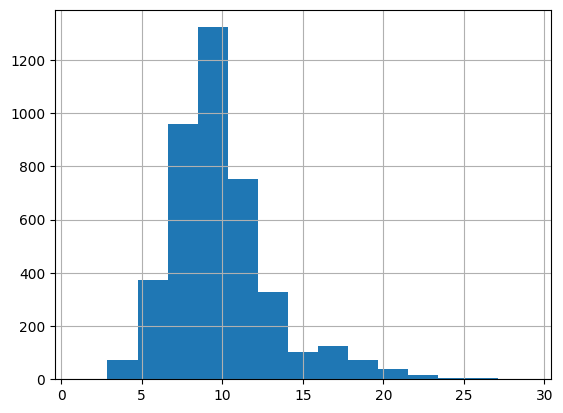

In [11]:
abalone["Rings"].hist(bins=15)
plt.show()

In [12]:
np.unique(abalone["Rings"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29])

In [13]:
pd.DataFrame(correlation_matrix["Rings"])

Rings
Sex            -0.034627
Length          0.556720
Diameter        0.574660
Height          0.557467
Whole weight    0.540390
Shucked weight  0.420884
Viscera weight  0.503819
Shell weight    0.627574
Rings           1.000000

**divide given columns into two types of variables (target variable and feature variables).**

In [14]:
x = abalone[abalone_columns[:-1]]
y = abalone['Rings']
x.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    2   0.455     0.365   0.095        0.5140          0.2245   
1    2   0.350     0.265   0.090        0.2255          0.0995   
2    0   0.530     0.420   0.135        0.6770          0.2565   
3    2   0.440     0.365   0.125        0.5160          0.2155   
4    1   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  
0          0.1010         0.150  
1          0.0485         0.070  
2          0.1415         0.210  
3          0.1140         0.155  
4          0.0395         0.055

### **Splitting Data**
80% train and 20% test

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### **Best K**

In [ ]:
k_values = [i for i in range (1,100)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    score = cross_val_score(knn, x, y, cv=10)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

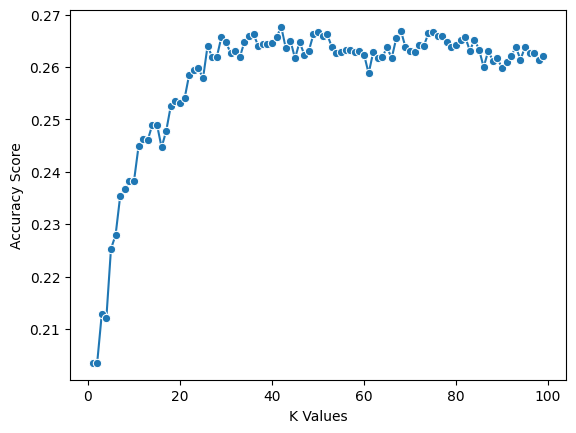

In [60]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [61]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
print('best K:', best_k)

best K: 42


### **Model**

In [16]:
scoring = {'accuracy' : make_scorer(precision_score, average = 'weighted'),
           'precision' : make_scorer(precision_score, average = 'weighted'),
           'recall' : make_scorer(recall_score, average = 'weighted'),
           'f1_score' : make_scorer(f1_score, average = 'weighted')}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
score = cross_validate(knn, x, y, cv=10, scoring=scoring)

In [ ]:
score

In [18]:
avg_accuracy = np.mean(score['test_accuracy'])
avg_precision = np.mean(score['test_precision'])
avg_recall = np.mean(score['test_recall'])
avg_f1_score = np.mean(score['test_f1_score'])
print('average accuracy=', avg_accuracy, '\naverage precision=', avg_precision, '\naverage recall=', avg_recall, '\naverage f1-score=', avg_f1_score)

average accuracy= 0.21858823834817454 
average precision= 0.21858823834817454 
average recall= 0.23822301010865948 
average f1-score= 0.22366166859680975


In [20]:
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
accuracy_score(y_test, pred)

0.2894736842105263